<a href="https://colab.research.google.com/github/MMaryse/Sandbox/blob/master/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Thu Oct 30 17:02:26 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   32C    P8              8W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device='cuda' if torch.cuda.is_available() else 'cpu'
device

2.8.0+cu126


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [ ]:
# 1. What are 3 areas in industry where computer vision is currently being used?

# Computer vision is used in many industries, including:
# - Healthcare (e.g., medical image analysis)
# - Manufacturing (e.g., quality control and automation)
# - Autonomous vehicles (e.g., object detection and navigation)

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [3]:
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
train_dataset=datasets.MNIST(root='data',train=True,download=True,transform=ToTensor())
test_dataset=datasets.MNIST(root='data',train=False,download=True,transform=ToTensor())

len(train_dataset),len(test_dataset)

100%|██████████| 9.91M/9.91M [00:00<00:00, 19.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 483kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.50MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 12.2MB/s]


(60000, 10000)

In [5]:
train_dataset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [6]:
train_dataset.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [10]:
train_dataset.targets.shape


torch.Size([60000])

## 6. Visualize at least 5 different samples of the MNIST training dataset.

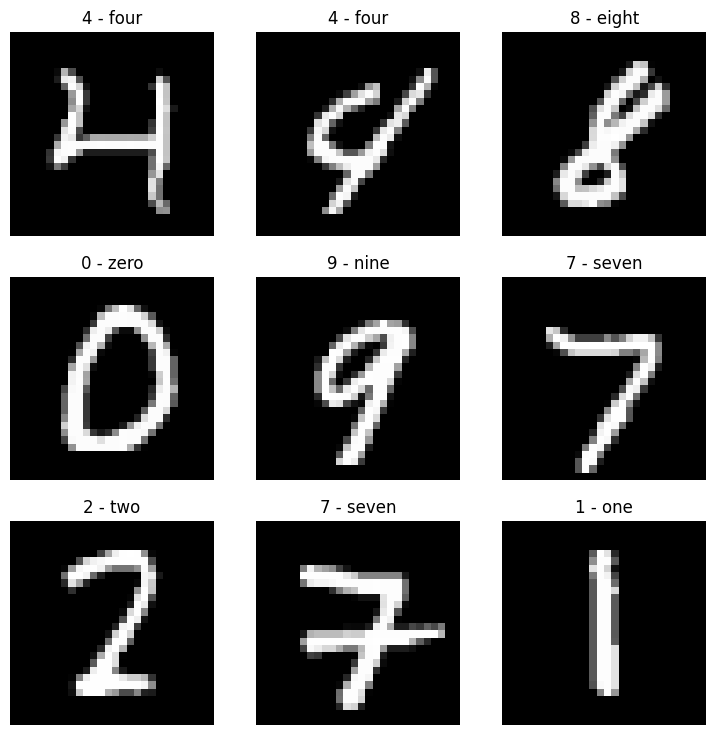

In [16]:
fig=plt.figure(figsize=(9,9))
rows,cols=3,3
for i in range(1,rows*cols+1):
    random_idx=torch.randint(0,len(train_dataset),size=[1]).item()
    img,label=train_dataset[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(train_dataset.classes[label])
    plt.axis(False)

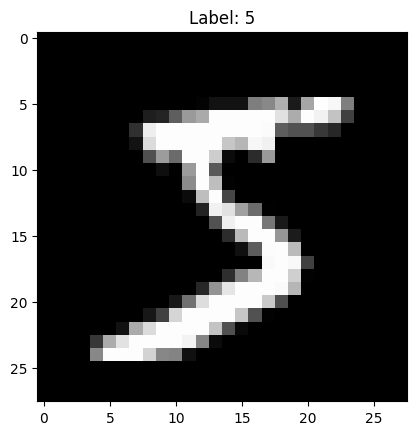

In [13]:
plt.imshow(img1.squeeze(), cmap='gray')
plt.title(f'Label: {label1}')
plt.show()

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [24]:
train_dataloader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_dataloader=DataLoader(test_dataset,batch_size=32,shuffle=False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [18]:
class TinyVGG(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.block1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.block2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,out_features=output_shape)
        )
    def forward(self,x:torch.tensor):
        x=self.block1(x)
        x=self.block2(x)
        return self.classifier(x)

model_2=TinyVGG(input_shape=1,hidden_units=10,output_shape=len(train_dataset.classes)).to(device)

In [19]:
model_2.state_dict()

OrderedDict([('block1.0.weight',
              tensor([[[[ 0.3056, -0.0482, -0.3249],
                        [-0.0990,  0.2653,  0.0739],
                        [-0.0865,  0.1726,  0.1749]]],
              
              
                      [[[ 0.1462, -0.0595, -0.0192],
                        [-0.1150, -0.1308, -0.1672],
                        [-0.0066, -0.0461, -0.1518]]],
              
              
                      [[[-0.0450, -0.1684,  0.1132],
                        [ 0.1058,  0.0183,  0.2987],
                        [-0.1986, -0.1759, -0.0918]]],
              
              
                      [[[ 0.0624,  0.2939, -0.0224],
                        [ 0.2323, -0.0591,  0.3006],
                        [ 0.0271, -0.0141, -0.2353]]],
              
              
                      [[[ 0.0764, -0.3178, -0.1095],
                        [ 0.0775,  0.1273, -0.1498],
                        [ 0.1506,  0.2916,  0.1321]]],
              
              
            

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [26]:
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device:torch.device):
    model.train()
    train_loss,train_acc=0,0
    for batch,(X,y) in enumerate(dataloader):
        X,y=X.to(device),y.to(device)
        y_pred=model(X)
        loss=loss_fn(y_pred,y)
        train_loss+=loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        train_acc+=(y_pred_class==y).sum().item()*100.0/len(y_pred)
        #print what's happening
        if batch%400==0:
            print(f"Looked at {batch*len(X)}/{len(dataloader.dataset)} samples")

    train_loss/=len(dataloader)
    train_acc/=len(dataloader)
    print(f"train loss:{train_loss:.5f}|train acc:{train_acc:.2f}")
    return f"train loss:{train_loss:.5f}", f"train acc:{train_acc:.2f}"




In [30]:
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              device:torch.device):
  model.eval()
  test_loss,test_acc=0,0
  with torch.inference_mode():
    for X,y in dataloader:
      X,y=X.to(device),y.to(device)
      test_pred_logits=model(X)
      loss=loss_fn(test_pred_logits,y)
      test_loss+=loss.item()
      test_pred_labels=torch.argmax(torch.softmax(test_pred_logits,dim=1),dim=1)
      test_acc+=(test_pred_labels==y).sum().item()*100.0/len(test_pred_labels)

  test_loss/=len(dataloader)
  test_acc/=len(dataloader)
  #print what's happening
  print(f"test loss:{test_loss:.5f}|test acc:{test_acc:.2f}")
  return test_loss, test_acc

In [31]:
from tqdm.auto import tqdm
#Train and test the model
epochs=5
train_losses=[]
train_accs=[]
test_losses=[]
test_accs=[]
for epoch in tqdm(range(epochs)):
    print(f"Epoch:{epoch+1}")
    train_loss,train_acc=train_step(model=model_2,dataloader=train_dataloader,loss_fn=nn.CrossEntropyLoss(),optimizer=torch.optim.Adam(params=model_2.parameters(),lr=0.01),device=device)
    test_loss,test_acc=test_step(model=model_2,dataloader=test_dataloader,loss_fn=nn.CrossEntropyLoss(),device=device)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    print("-"*40)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:1
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
train loss:0.10297|train acc:96.89
test loss:0.10065|test acc:96.95
----------------------------------------
Epoch:2
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
train loss:0.10465|train acc:96.86
test loss:0.10147|test acc:97.09
----------------------------------------
Epoch:3
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
train loss:0.10254|train acc:96.84
test loss:0.09308|test acc:97.17
----------------------------------------
Epoch:4
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
train loss:0.10302|train acc:96.86
test loss:0.08462|test

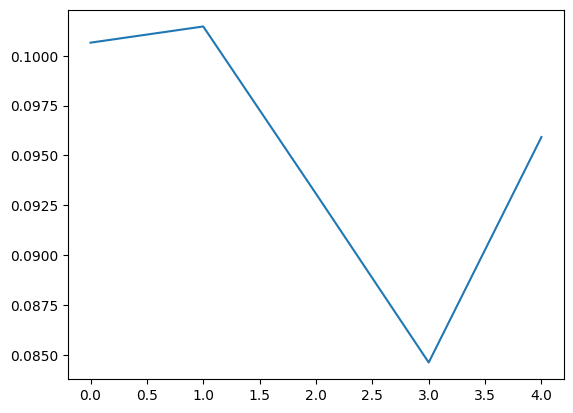

In [35]:
plt.plot(test_losses)

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [50]:
def make_predictions(model:torch.nn.Module,
                     dataloader:torch.utils.data.DataLoader,
                     device:torch.device):
    model.eval()
    with torch.inference_mode():
        predictions=[]
        labels=[]
        for X,y in dataloader:
            X,y=X.to(device),y.to(device)
            y_pred=model(X)
            y_pred_labels=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
            predictions.append(y_pred_labels.cpu())
            labels.append(y.cpu())

        predictions=torch.cat(predictions)
        labels=torch.cat(labels)
        return predictions,labels


In [51]:
y_predictions=make_predictions(model=model_2,dataloader=test_dataloader,device=device)[0]
y_labels=make_predictions(model=model_2,dataloader=test_dataloader,device=device)[1]

In [52]:
y_predictions

tensor([7, 2, 1,  ..., 4, 5, 6])

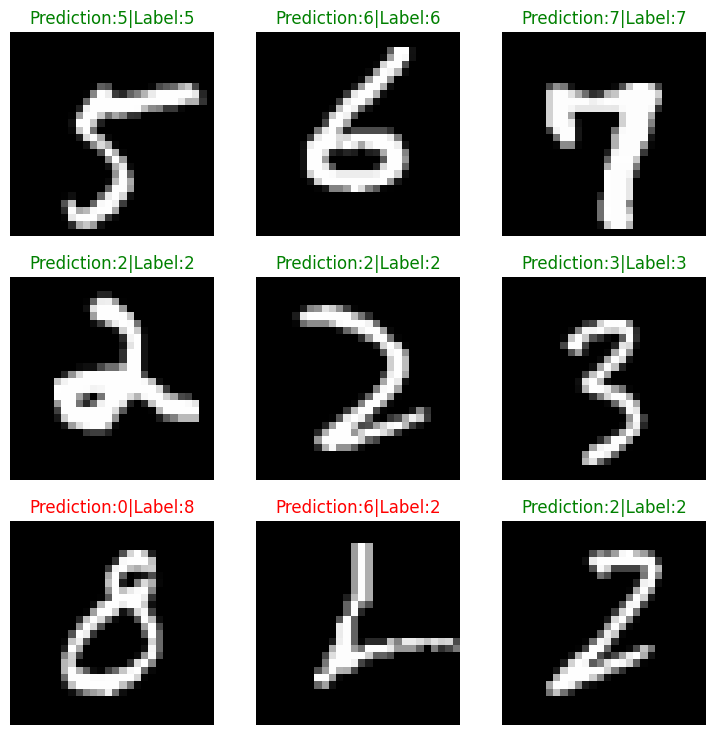

In [62]:
#plot some predictions and compare with true labels
fig=plt.figure(figsize=(9,9))
rows,cols=3,3
for i in range(1,rows*cols+1):
    random_idx=torch.randint(0,len(test_dataset),size=[1]).item()
    img,label=test_dataset[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap="gray")
    if y_predictions[random_idx]==label:
        plt.title(f'Prediction:{y_predictions[random_idx]}|Label:{label}',color='green')
    else:
        plt.title(f'Prediction:{y_predictions[random_idx]}|Label:{label}',color='red')
    plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

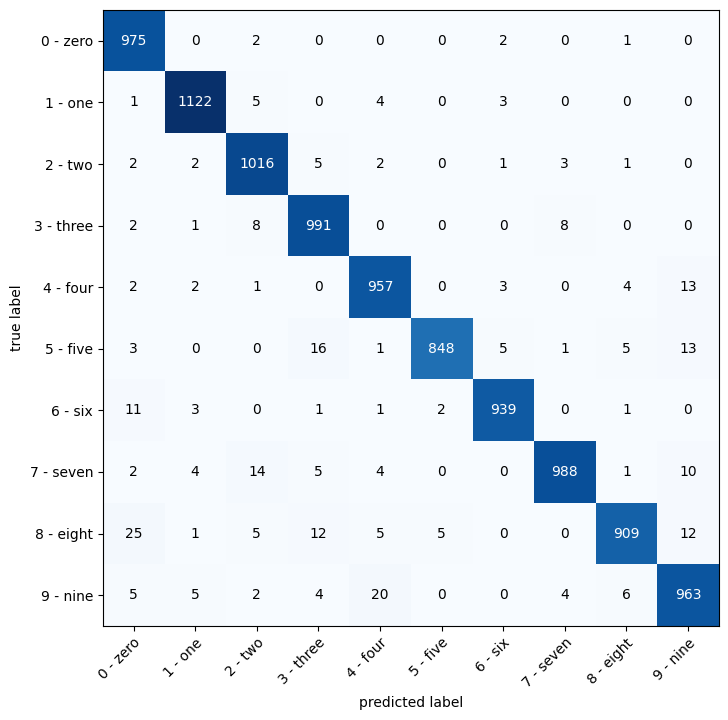

In [67]:
import torchmetrics, mlxtend
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix # type: ignore

#2. Setup confusion instance and compare predictions to targets
confmat= ConfusionMatrix(task='multiclass',num_classes=len(test_dataset.classes))
confmat_tensor=confmat(preds=y_predictions,
                       target=y_labels,
                       )
#3. Plot the confusion matrix
fig,ax=plot_confusion_matrix(
    conf_mat =confmat_tensor.numpy(),# matplotlib likes working with numpy
    class_names=test_dataset.classes,
    figsize= (10,8)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [85]:
X_random=torch.rand(size=(1,3,64,64))
X_random_conv=nn.Conv2d(in_channels=3,out_channels=10,kernel_size=2,padding=2,stride=1)(X_random)
X_random_conv.shape

torch.Size([1, 10, 67, 67])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [88]:
FashionMNIST_test_dataset=datasets.FashionMNIST(root='data',train=False,download=True,transform=ToTensor())
FashionMNIST_test_dataloader=DataLoader(FashionMNIST_test_dataset,batch_size=32,shuffle=False)
y_predictions_FashionMnist=make_predictions(model=model_2,
                                            dataloader=FashionMNIST_test_dataloader,
                                            device=device)[0]
y_labels_FashionMnist=make_predictions(model=model_2,
                                       dataloader=FashionMNIST_test_dataloader,device=device)[1]

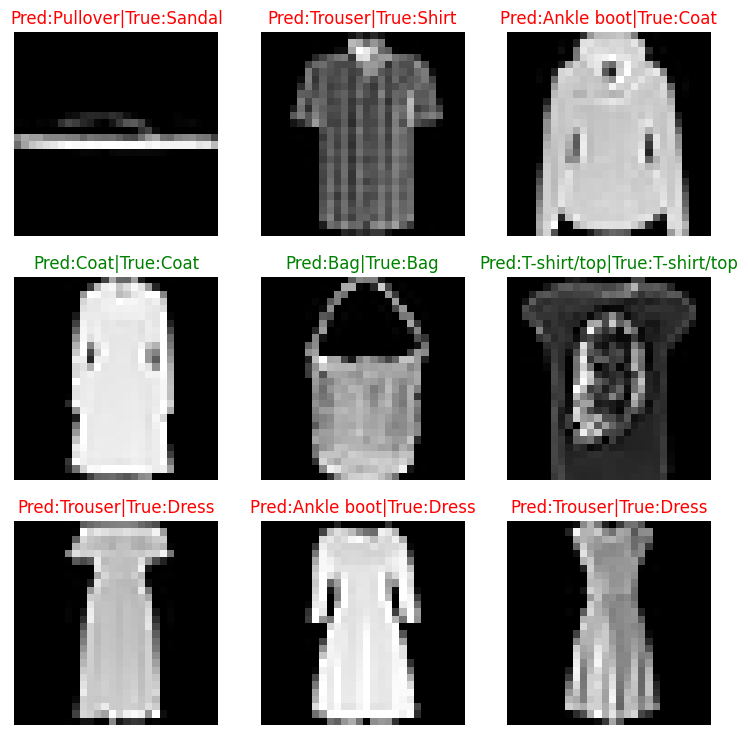

In [96]:
# plot some predictions for FashionMNIST and compare with true labels using
# model 2
fig=plt.figure(figsize=(9,9))
rows,cols=3,3
for i in range(1,rows*cols+1):
    random_idx=torch.randint(0,len(FashionMNIST_test_dataset),size=[1]).item()
    img,label=FashionMNIST_test_dataset[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap="gray")
    if y_predictions_FashionMnist[random_idx]==label:
        plt.title(f'Pred:{FashionMNIST_test_dataset.classes[y_predictions_FashionMnist[random_idx]]}|True:{FashionMNIST_test_dataset.classes[label]}',color='green')
    else:
        plt.title(f'Pred:{FashionMNIST_test_dataset.classes[y_predictions_FashionMnist[random_idx]]}|True:{FashionMNIST_test_dataset.classes[label]}',color='red')
    plt.axis(False)